In [39]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
housing_bunch = fetch_california_housing()
housing_df = pd.DataFrame(housing_bunch.data, columns=housing_bunch.feature_names)
y = housing_bunch.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [41]:
X = housing_df.drop(['Latitude', 'Longitude'], axis=1)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [42]:
model = LinearRegression()
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=42)
model.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
predictions = model.predict(val_X)
print(r2_score(val_y,predictions))
print(mean_squared_error(val_y, predictions))

0.5248613055247979
0.6287121228743693


In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
new_model = PolynomialFeatures(degree=2)
# the fit_transform creates new features out of the original features
# features like x1**2, x2**2,....,x6**2 and x1*x2, x1*x3,....., x5*x6
# this is for degree = 2 and if it would be 3 then it would add -
# x1**2*x2, x1**3, x1*x2*x3, x1*x2 and more like this......
modi_train_X = new_model.fit_transform(train_X, train_y)
# transformed the training dataset
modi_val_X = new_model.transform(val_X)
# transformed the testing dataset

In [46]:
Linear_model_2 = LinearRegression()
Linear_model_2.fit(modi_train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
predictions_2 = Linear_model_2.predict(modi_val_X)
# made predictions on the basis of transformed model
print(r2_score(predictions_2, val_y))
print(mean_squared_error(predictions_2, val_y))

0.3225571371095809
0.5463203955349206


In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler().fit(train_X)
# StandardScaler = (xi - mean)/standard deviation
scaler

,copy,True
,with_mean,True
,with_std,True


In [53]:
StandardScaled_train_X = scaler.transform(train_X)
StandardScaled_train_X

array([[ 0.17648852,  0.66640687, -0.06085431, -0.2811182 , -0.49654414,
        -0.04828325],
       [ 0.77137436,  1.06288858,  0.38352076, -0.02037756, -0.41167187,
        -0.05872947],
       [ 0.02142423,  0.58711053,  0.27852339, -0.08462537, -0.62691494,
        -0.07283798],
       ...,
       [-0.49582442,  0.58711053, -0.5983225 , -0.03916402,  0.28743062,
         0.01885405],
       [ 0.96699069, -1.07811266,  0.39633361, -0.06586899,  0.30580503,
         0.0060417 ],
       [-0.68434939,  1.855852  , -0.83954627, -0.08684115,  1.0425313 ,
        -0.08347358]], shape=(15480, 6))

In [59]:
train_X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.878314,28.595995,5.435598,1.096881,1427.497287,3.106660
std,1.903788,12.611330,2.421650,0.438804,1142.930862,11.955834
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308
25%,2.566925,18.000000,4.450000,1.006593,788.750000,2.430205
50%,3.543900,29.000000,5.232331,1.049346,1167.000000,2.817672
75%,4.762500,37.000000,6.058141,1.100143,1727.000000,3.280020
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333


In [65]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1c65d132610>,
 'caps': [<matplotlib.lines.Line2D at 0x1c65d1338d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c65d131e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1c65d144bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c65d1454d0>],
 'means': []}

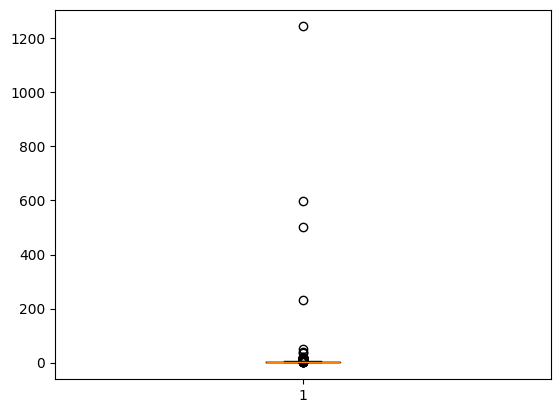

In [71]:
plt.boxplot(data=train_X, x =  'AveOccup')
# 'MedInc' has all outliers above the upper boundary
# 'HouseAge' has no outlier
# 'AveRooms' has a most oultiers above the upper boundary and small number of outliers below lower boundary
# 'AveBedrms' also has large number of outlier
# 'Population' shows large number of outlier above the upper boundary
# 'AveOccup' also has large number of outliers

In [73]:
model_StandardScaled = LinearRegression()
model_StandardScaled.fit(StandardScaled_train_X, train_y)
val_X_scaled = scaler.transform(val_X)
pred_StandarScaled = model_StandardScaled.predict(val_X_scaled)
print(r2_score(val_y, pred_StandarScaled))
print(mean_squared_error(val_y, pred_StandarScaled))

0.524861305524797
0.6287121228743705


In [76]:
MinMax = MinMaxScaler()
train_X_MinMax = MinMax.fit_transform(train_X)
# MinMaxScaler = (xi - x_min)/(x_max - x_min)
# in fit function the variable stores the value and tranform it according to the v=stored value
# in this case 'X_train_MinMax' stored X_min and and x_max - x_min 
# and when the same 'X_train_MinMax' is used on different dataset by just transform then it applies the same stored value to the new dataset
model_MinMax = LinearRegression()
model_MinMax.fit(train_X_MinMax, train_y)
val_X_MinMax = MinMax.transform(val_X)

pred_MinMax = model_MinMax.predict(val_X_MinMax)
print(r2_score(val_y, pred_MinMax))
print(mean_squared_error(val_y, pred_MinMax))

0.524861305524797
0.6287121228743704
